In [1]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt

<h2> Data </h2>

In [2]:
#Data for training
X_train = np.array([[0],[2],[4],[6],[8],[10]])
y_train = np.array([0, 1, 0, 1, 0, 1])

#Data for testing 
X_test = np.array([[-2],[12],[14],[16]])
y_test = np.array([1, 0, 1, 0])

<h2>Helper Plot</h2>

In [3]:
def plot(snnn):
    plt.plot(X_train[y_train==0], np.zeros_like(X_train[y_train==0]), 'x')
    plt.plot(X_train[y_train==1], np.zeros_like(X_train[y_train==1]), 'o')
    plt.plot(snnn.wei[1],0,'ro') 
    plt.title("Training Points")
    plt.show()

<h2>Single Neuron Neural Network Class</h2>

In [10]:
#Single layer neural network
class SingleNeuronNN:
    def __init__(self,wei,ep,lr,act):
        self.wei = wei
        self.ep = ep
        self.lr = lr
        self.act = act
    
    def activation(self, x_i):
        if self.act == 'sigmoid':
            return 1/(1 + np.exp(-x_i)) 
        
        elif self.act == 'tanh':
            return np.tanh(x_i)
    
        elif self.act == 'sign':
            return np.sign(x_i)
        
        elif self.act == 'sine':
            return math.sin(x_i) if x_i != 0 else 1
    
    def activationGradient(self,x_i):
        if self.act == 'sigmoid':
            sigmoid = self.activation(x_i)
            return sigmoid*(1-sigmoid)
        
        elif self.act == 'tanh':
            return 1 - self.activation(x_i)**2
        
        elif self.act == 'sign':
            return 1
        
        elif self.act == 'sine':
            if x_i!=0:
                return ((math.cos(x_i)/x_i)-math.sin(x_i))/(x_i**2)
            else : 
                return 0
        
    def forwardOrPredict(self, x_i):  
        if self.act == 'sigmoid':
            t = 0.5
        if self.act == 'tanh':
            t = 0
        if self.act == 'sign':
            t = 0
        if self.act == 'sine':
            t = 0
        
        op_val = self.activation(self.wei.T.dot(x_i))
        
        if op_val<t:
            op = 0
        if op_val>=t: 
            op = 1
                
        return op,op_val
 
    #using early stopping if error for each training example is 0 for five consecutive epochs/weights not change
    def fit(self, X_train, y_train):
        
        counter = 0
        
        #For defined no of epochs over all training examples
        for dump in range(self.ep):
            if counter>4 :
                break
        
            err = []
            print("--------epoch No-------- : ",dump)
            print("weight : ",self.wei)
            #For all training examples
            for i in range(X_train.shape[0]):
                
                
                #Sincle training example and output
                #x_i = X_train[i]
                x_i = np.insert(X_train[i], 0, 1)
                y_i = y_train[i]
                
                #Forward pass
                y_hat_i,y_hat_i_val = self.forwardOrPredict(x_i)
                
                #Calculate error with prediction and original label
                #print(y_i,"-----",y_hat_i)
                error = y_i - y_hat_i
                err.append(error)
                #print("Error : ",error)
                
                #Weight update
                self.wei +=  self.lr * np.dot(x_i,(error* self.activationGradient(y_hat_i_val)))
                #print(self.wei)
                
            #Plot boundary
            #plot(self)
                
            if np.any(err)==False:
                counter+=1
            else:
                counter =0

<h2>Params</h2>

In [5]:
#Initializing weights with 0 (for bias also)
weights = np.zeros(2)

#Other parameters
learning_rate=1 
max_epochs=10
activation = 'tanh'

<h2> Training With Delta Rule</h2>

In [6]:
snnn = SingleNeuronNN(weights, max_epochs, learning_rate, activation)
snnn.fit(X_train,y_train)

--------epoch No-------- :  0
weight :  [0. 0.]
--------epoch No-------- :  1
weight :  [0. 6.]
--------epoch No-------- :  2
weight :  [-2.  4.]
--------epoch No-------- :  3
weight :  [-2.  8.]
--------epoch No-------- :  4
weight :  [-3.  6.]
--------epoch No-------- :  5
weight :  [-4.  4.]
--------epoch No-------- :  6
weight :  [-4.  8.]
--------epoch No-------- :  7
weight :  [-5.  6.]
--------epoch No-------- :  8
weight :  [-6.  4.]
--------epoch No-------- :  9
weight :  [-6.  8.]


Final weights  [-7.  6.]


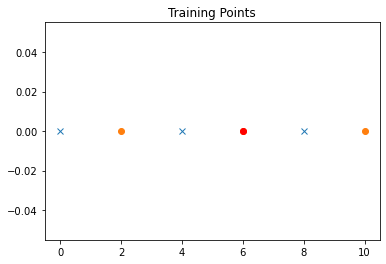

In [7]:
print("Final weights ",snnn.wei)
plot(snnn)

<h2>Predictions</h2>

In [8]:
#Prediction on test set
y_pred = []
for i in range(X_test.shape[0]):
    x_i = np.insert(X_test[i], 0, 1)
    op,op_val = snnn.forwardOrPredict(x_i)
    y_pred.append(op)
    
print(X_test)
print("Original" ,y_test)
print("Predicted",np.array(y_pred))

[[-2]
 [12]
 [14]
 [16]]
Original [1 0 1 0]
Predicted [0 1 1 1]


In [9]:
#Prediction on train set
y_pred_train = []
for i in range(X_train.shape[0]):
    x_i = np.insert(X_train[i], 0, 1)
    op,op_val = snnn.forwardOrPredict(x_i)
    y_pred_train.append(op)
    
print(X_train)
print("Original" ,y_train)
print("Predicted",np.array(y_pred_train))

[[ 0]
 [ 2]
 [ 4]
 [ 6]
 [ 8]
 [10]]
Original [0 1 0 1 0 1]
Predicted [0 1 1 1 1 1]


<h2>Model Save</h2>

In [65]:
#Save weight and bias
import pickle
with open("q3_tanh_model",'wb') as f:
    pickle.dump(snnn.wei,f)